# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

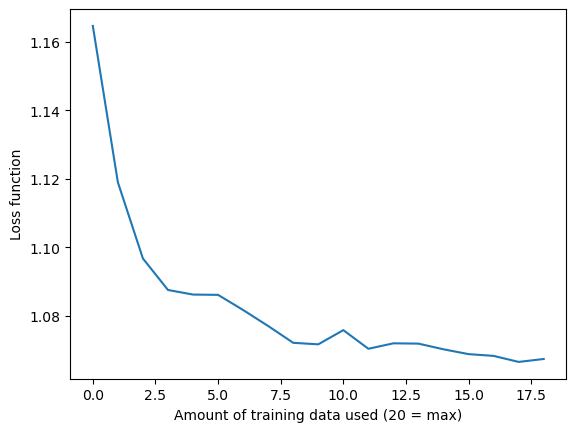

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

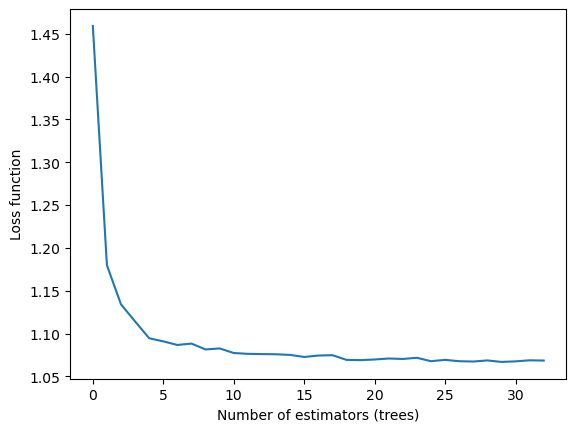

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

I think the graph that shows the training data should be cut. I beleive the graph showing the number of estiamtors is more important as the graph just showing the training data tells you how many rows are being used.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [4]:
# Combine files
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

# Combine them vertically (row-wise)
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2,5]
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    scoring = rmse_scorer,
    cv=repeated_cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

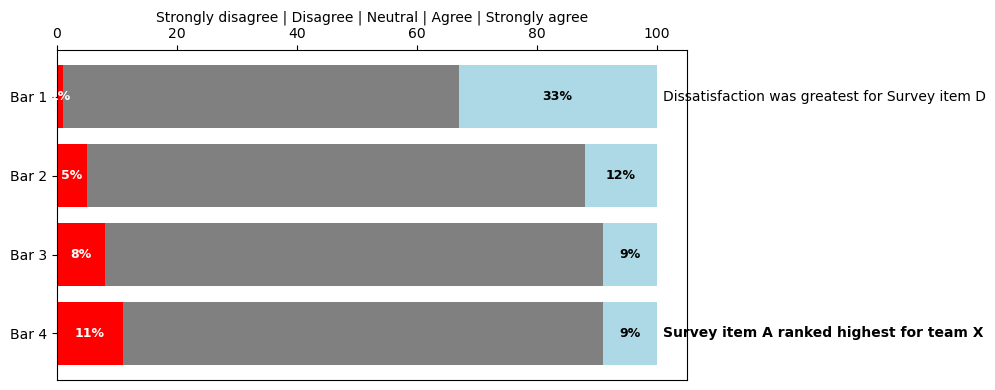

In [ ]:
import matplotlib.pyplot as plt

# Bar names and segment values
bar_names = ['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4']
red = [1, 5, 8, 11]
blue = [33, 12, 9, 9]
grey = [100 - (r + b) for r, b in zip(red, blue)]

# Flip order so Bar 1 is on top
bar_names = bar_names[::-1]
red = red[::-1]
blue = blue[::-1]
grey = grey[::-1]

# Bar positions
bar_positions = range(len(bar_names))

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Red bars
ax.barh(bar_positions, red, color='red', label='Strongly Disagree')

# Grey bars
ax.barh(bar_positions, grey, left=red, color='grey', label='Disagree | Neutral | Agree')

# Blue bars
lefts_blue = [r + g for r, g in zip(red, grey)]
ax.barh(bar_positions, blue, left=lefts_blue, color='lightblue', label='Strongly Agree')

# percentage labels on red and blue sections
for i, (r, b, g) in enumerate(zip(red, blue, grey)):
    if r > 0:
        ax.text(r / 2, i, f'{r}%', va='center', ha='center', color='white', fontsize=9, fontweight='bold')
    if b > 0:
        ax.text(r + g + b / 2, i, f'{b}%', va='center', ha='center', color='black', fontsize=9, fontweight='bold')

# Axis settings
ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_names)
ax.set_xlim(0, 105)  # Extend to make room for text
ax.set_xticks(range(0, 101, 20))
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Strongly disagree | Disagree | Neutral | Agree | Strongly agree")

# custom text to the right of the plot
ax.text(101, bar_positions[0], "Survey item A ranked highest for team X", va='center', ha='left', fontsize=10, fontweight='bold')
ax.text(101, bar_positions[-1], "Dissatisfaction was greatest for Survey item D", va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()
